In [1]:
import cv2
import time
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.nn import functional as F
from PIL import Image
import numpy as np
from enum import Enum

path_img = '/Users/apple/Downloads/BenchMark/dataset_5/train/Soccer/'
preprocess = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),
                                 transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)) ])
img = Image.open(path_img + '000030.jpg')
#img_tensor = preprocess(img)
#img_tensor = img_tensor.unsqueeze(0)
#print(img_tensor.shape)


# class ClassicCNN(Enum):
#     AlexNet, GoogLeNet, VggNet = 1,2,3
# from Classic_cnn_feat import Classic_feat
class ResCNN(Enum):
    ResNet, DenseNet, WildResNet, ResNext = 4,5,6,7
from Residual_cnn_feat import Residual_feat
# class LightCNN(Enum):
#     SqueezeNet, MobileNet, ShuffleNet, MnasNet = 8,9,10,11
# from LightWeight_cnn_feat import LightWeight_feat


model_type = ResCNN.ResNet.value #LightCNN.MnasNet.value # ClassicCNN.GoogLeNet.value
cnn_type = 50#'1_0'#'Large'#'1_0'
cnn_layer_test = 4
feat_visual, use_CAM, save_cam = False, True,False

# net = Classic_feat(model_type,cnn_type,cnn_layer_test)
net = Residual_feat(model_type,cnn_type,cnn_layer_test)
# net = LightWeight_feat(model_type,cnn_type,cnn_layer_test)
y = net.get_cnn_feat(img, feat_visual, use_CAM, save_cam)

print(y.shape)

use ResNet 50
test single conv layer 4
feat_cam:  (1, 2048, 7, 7) logit out:  torch.Size([1, 1000])
h_x:  torch.Size([1000])
feature_conv.shape:  (1, 2048, 7, 7)
weight_softmax[idx]:  (2048,) [ 0.01226634  0.04496276  0.0001124  ...  0.01202241 -0.02537782
  0.0427799 ]
raw cam shape: (7, 7)
CAM feature:  (7, 7)
cam_img shape: (7, 7)
(224, 224)
(1, 2048, 7, 7)
(1, 2048, 7, 7)


In [4]:
import cv2
import time
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.nn import functional as F
from PIL import Image
import numpy as np
from enum import Enum

path_img = '/Users/apple/Downloads/BenchMark/dataset_5/train/Soccer/'
preprocess = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),
                                 transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)) ])
img = Image.open(path_img + '000030.jpg')
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)
print(img_tensor.shape)

#model = models.densenet161(pretrained=True)
#model = models.squeezenet1_0(pretrained=True)
#model = models.squeezenet1_1(pretrained=True)
#model = models.mnasnet0_5(pretrained=True)
model = models.mnasnet1_0(pretrained=True)

# cnn_type = 'Large'
# from MobileNetv3_feat import MobileNet_feat
# model = MobileNet_feat(cnn_type, True, 1000)
# model.eval()
# x = img_tensor

# feat = []
# x = model.hs1(model.bn1(model.conv1(x))) # 16*112*112
# feat.append(x.cpu().numpy()) # feat1 112
# x = model.bneck(x)

# x = model.hs2(model.bn2(model.conv2(x))) # 960*7*7
# feat.append(x.cpu().numpy()) # feat2 7

# x = F.avg_pool2d(x, 7)
# x = x.view(x.size(0), -1)
# x = model.hs3(model.bn3(model.linear3(x)))
# feat.append(x.cpu().numpy()) # feat3 CAM
# x = model.linear4(x)


# classifier = model.classifier
# features = list(model.features)
features = list(model.layers)
print(len(features))
for i in range(len(features)):
    print('Block',i,':\n', features[i],'\n')

# features = list(model.features)[:]
# features = nn.ModuleList(features).eval()

# results = []
# x = img_tensor
# for ii, model in enumerate(features):
#     x = model(x)
#     print(ii, "x: ", x.shape)
#     if ii in {6,8,10,16}:
#         print("get featture: ", ii, x.shape)
#         results.append(x.detach().numpy())
# # x = F.relu(x, inplace=True)
# # x = F.adaptive_avg_pool2d(x, (1, 1))
# # x = torch.flatten(x, 1)
# x = x.mean([2, 3])
# print(x.shape)
# x = classifier(x)
# print(x.shape)




torch.Size([1, 3, 224, 224])
17
Block 0 :
 Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False) 

Block 1 :
 BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True) 

Block 2 :
 ReLU(inplace=True) 

Block 3 :
 Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False) 

Block 4 :
 BatchNorm2d(32, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True) 

Block 5 :
 ReLU(inplace=True) 

Block 6 :
 Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False) 

Block 7 :
 BatchNorm2d(16, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True) 

Block 8 :
 Sequential(
  (0): _InvertedResidual(
    (layers): Sequential(
      (0): Conv2d(16, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.00029999999999996696, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Co

In [21]:
import time
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.nn import functional as F
from PIL import Image
import numpy as np
from enum import Enum

class CNNfeat(Enum): # test CNN
    AlexNet, GoogLeNet, VggNet = 1,2,3
    ResNet, DenseNet, WildResNet, ResNext = 4,5,6,7
    SqueezeNet, MobileNet, ShuffleNet, MnasNet = 8,9,10,11

path_img = '/Users/apple/Downloads/BenchMark/dataset_5/train/Soccer/'
preprocess = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),
                                 transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)) ])

img_tensor = []
for i in range(5):
    img = Image.open(path_img + '00003'+str(i)+'.jpg')
    img = preprocess(img)
    img = img.unsqueeze(0)
    img_tensor.append(img)

for i in range(11):
    if i+1 == CNNfeat.AlexNet.value:
        net = models.alexnet(pretrained=True)
        print(CNNfeat.AlexNet)
    elif i+1 == CNNfeat.GoogLeNet.value:
        #net = models.googlenet(pretrained=True) # GoogleNet
        net = models.inception_v3(pretrained=True) # inception
        print(CNNfeat.GoogLeNet)
    elif i+1 == CNNfeat.VggNet.value:
        net = models.vgg19_bn(pretrained=True) # vgg_19
        print(CNNfeat.VggNet)
    elif i+1 == CNNfeat.ResNet.value:
        net = models.resnet101(pretrained=True) # ResNet_101
        print(CNNfeat.ResNet)
    elif i+1 == CNNfeat.DenseNet.value:
        net = models.densenet161(pretrained=True) # DenseNet_161
        print(CNNfeat.DenseNet)
    elif i+1 == CNNfeat.WildResNet.value:
        net = models.wide_resnet50_2(pretrained=True)
        print(CNNfeat.WildResNet)
    elif i+1 == CNNfeat.ResNext.value:
        net = models.resnext50_32x4d(pretrained=True)
        print(CNNfeat.ResNext)
    elif i+1 == CNNfeat.SqueezeNet.value:
        net = models.squeezenet1_1(pretrained=True)
        print(CNNfeat.SqueezeNet)
    elif i+1 == CNNfeat.MobileNet.value:
        net = models.mobilenet_v2(pretrained=True) # MobileNet_v2
        #from mobilenetv3 import MobileNetV3_Large
        #net = MobileNetV3_Large()
        print(CNNfeat.MobileNet)
    elif i+1 == CNNfeat.ShuffleNet.value:
        net = models.shufflenet_v2_x1_0(pretrained=True)
        print(CNNfeat.ShuffleNet)
    elif i+1 == CNNfeat.MnasNet.value:
        net = models.mnasnet1_0(pretrained=True)
        print(CNNfeat.MnasNet)
    else:
        continue
    net.eval() # use cpu
    
    use_time = 0.
    for i in range(5):
        start = time.time()
        out = net.forward(img_tensor[i])
        end = time.time()
        use_time += (end-start)
    print('forward time:', use_time/5.,'\n')
    

CNNfeat.AlexNet
forward time: 0.03282952308654785 

CNNfeat.SqueezeNet
forward time: 0.031113862991333008 

CNNfeat.ShuffleNet
forward time: 0.03502020835876465 

CNNfeat.MnasNet
forward time: 0.13024616241455078 



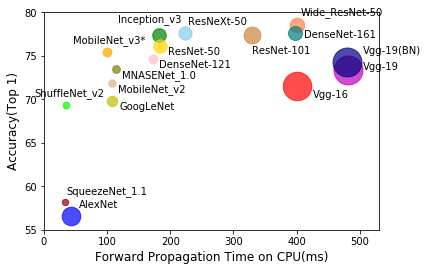

In [4]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 2D散点图
def draw_scatter(data,text,loc,name): # p_num, p_scale, data
    
    # split data into x,y_axis
    if type(data) != type([]):
        x1 = data[:,0]
        y1 = data[:,1]
        l,r = int(np.min(x1)-40),int(np.max(x1)+40)
    else:
        color = ['b','y','g','r','m','navy','gold','peru','coral',
                 'skyblue','pink','teal','darkred','lime','orange','tan','olive']
        mark = ['o','^','.','*',',']
        x,y = [],[]
        for d in data:
            d = np.array(d)
            x.append(d[0])
            y.append(d[2])
        l,r = 0,530
    
    fig = plt.figure()
    # split fig to 1,1 and use first area as sub_fig
    ax1 = fig.add_subplot(1,1,1)
    #ax1.set_title(name[0])
    ax1.set_xlabel(name[1],size=12)
    ax1.set_ylabel(name[2],size=12)
    if type(data) != type([]):
        ax1.scatter(x1,y1,s=p_scale,c='b',marker='^') # x,y,shape,color,MarkerStyle
    else:
        point = []
        for i in range(len(x)):
            p_scale = int((data[i][1]+25)*1.4)
            ax1.scatter(x[i],y[i],s=p_scale,c=color[i],alpha=0.7,marker='o')
            #p = ax1.scatter(x[i],y[i],s=20,c=color[i],alpha=0,marker='o',label=text[i])
            plt.text(x[i]+loc[i][0], y[i]+loc[i][1],text[i])
            #point.append(p)
    #plt.legend(tuple(point),tuple(text))
    #plt.legend(loc='right')
    plt.xlim(right=r,left=l)
    plt.ylim(55,80)
    plt.savefig('CNN.png',dpi=300)
    plt.show()


data = [[43.30,224,56.55],[107.10,52,69.78],[182.15,109,77.45],[400.27,553,71.59],[480.63,575,73.38],
        [480.20,575,74.24],[183.86,103,76.15],[328.90,179,77.37],[400.96,128,78.51],[223.88,100,77.62],
        [172.17,32,74.65],[397.24,116,77.65],[33.93,5,58.19],[35.52,9,69.36],[100.42,32,75.45],[108.24,14,71.88],
        [114.45,18,73.51]]
name = ['AlexNet','GoogLeNet','Inception_v3','Vgg-16','Vgg-19','Vgg-19(BN)','ResNet-50','ResNet-101',
        'Wide_ResNet-50','ResNeXt-50','DenseNet-121','DenseNet-161','SqueezeNet_1.1','ShuffleNet_v2',
        'MobileNet_v3*','MobileNet_v2','MNASENet_1.0']
loc = [[12,1],[12,-1],[-65,1.5],[25,-1.4],[25,0], [25,1],[12,-1],[0,-2.1],
       [5,1.2],[4,1],[10,-1],[15,-0.6],[1,1],[-50,1],
       [-55,1],[9,-1],[9,-1]]

plt_name = ['CNN compare','Forward Propagation Time on CPU(ms)','Accuracy(Top 1)']
draw_scatter(data,name,loc,plt_name)